---
## CSVファイル読み込み DataFrameに保存

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_encoding = 'Shift_JISx0213'
inputFile = ".\\Data\\05_DateTimeData.csv"
df = pd.read_csv(inputFile,index_col=False, encoding=csv_encoding)
display(df.head(5))

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
0,1,1000043,30120231,2019-05-06,13:07:11,0
1,4,1000043,30120231,2019-05-08,13:23:57,0
2,4,1000055,30120231,2019-05-08,13:23:57,0
3,2,1000055,30120231,2019-05-07,13:05:52,0
4,2,1000057,30120231,2019-05-07,13:05:52,0


---
## DataFrame内の値を調整
### ImpDate列の値を、右から5文字だけにする

In [2]:
df['ImpDate'] = df['ImpDate'].map(lambda x : x[-5:])
display(df.head(5))
display(df.shape)

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
0,1,1000043,30120231,05-06,13:07:11,0
1,4,1000043,30120231,05-08,13:23:57,0
2,4,1000055,30120231,05-08,13:23:57,0
3,2,1000055,30120231,05-07,13:05:52,0
4,2,1000057,30120231,05-07,13:05:52,0


(312372, 6)

### ClaCodeには1と0が存在するので、0だけにする

In [3]:
df_Cla0 = df[df["ClaCode"] ==0]
display(df_Cla0.shape)

(292904, 6)

---
## ProNum(1～5)の値でDataFrameを分割

In [4]:
df_p1 = df_Cla0[df_Cla0["ProNum"]==1]
df_p2 = df_Cla0[df_Cla0["ProNum"]==2]
df_p3 = df_Cla0[df_Cla0["ProNum"]==3]
df_p4 = df_Cla0[df_Cla0["ProNum"]==4]
df_p5 = df_Cla0[df_Cla0["ProNum"]==5]
display(df_p1.head(5))

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
0,1,1000043,30120231,05-06,13:07:11,0
11,1,1000061,30120231,05-06,13:07:11,0
22,1,1000101,30120231,05-06,13:07:11,0
24,1,1000104,30120231,05-06,13:07:11,0
25,1,1000106,30120231,05-06,13:07:11,0


---
## ImpDateでグルーピングし、グルーピングされた行数(count())を保持

In [5]:
df_p1_byDate = df_p1.groupby(["ImpDate"]).count()
df_p2_byDate = df_p2.groupby(["ImpDate"]).count()
df_p3_byDate = df_p3.groupby(["ImpDate"]).count()
df_p4_byDate = df_p4.groupby(["ImpDate"]).count()
df_p5_byDate = df_p5.groupby(["ImpDate"]).count()
display(df_p1_byDate.head(5))

,ProNum,AnsShNum,SchCode,ImpTime,ClaCode
ImpDate,,,,,
04-23,126,126,126,126,126
04-24,203,203,203,203,203
04-25,332,332,332,332,332
04-26,489,489,489,489,489
04-27,323,323,323,323,323


---
## AnsShNumの値だけにし、ヘッダを変更

In [9]:
df_p1_byDate_count = df_p1_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro1-1"})
df_p2_byDate_count = df_p2_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro1-2"})
df_p3_byDate_count = df_p3_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro1-3"})
df_p4_byDate_count = df_p4_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro2"})
df_p5_byDate_count = df_p5_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro3"})
display(df_p3_byDate_count.head(5))

,Pro1-3
ImpDate,
05-01,11
05-02,15
05-03,59
05-04,252
05-06,720


---
## ProNum(1～5)で分けたDataFrameを連結

In [10]:
df_result = pd.concat([df_p1_byDate_count, df_p2_byDate_count], axis=1, sort=False)
df_result = pd.concat([df_result, df_p3_byDate_count], axis=1, sort=False)
df_result = pd.concat([df_result, df_p4_byDate_count], axis=1, sort=False)
df_result = pd.concat([df_result, df_p5_byDate_count], axis=1, sort=False)
df_result = df_result.sort_index(ascending=True)
df_result = df_result.fillna(0)
df_result = df_result.astype('int64')
display(df_result.head(5))

,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
04-23,126,1,0,28,0
04-24,203,1,0,0,0
04-25,332,3,0,71,80
04-26,489,3,0,15,58
04-27,323,5,0,4,73



---
## 積み上げ棒グラフにする

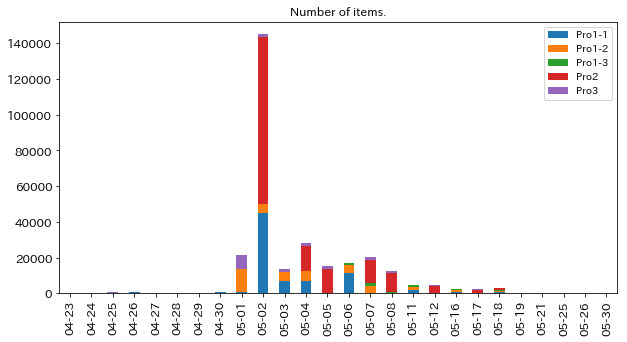

In [11]:
df_result.plot(kind='bar', stacked=True,  title = "Number of items.", figsize=(10, 5), fontsize=12)